Notebook is copyright &copy; of <a href="https://ajaytech.co">Ajay Tech</a>. You can find the same content online on <a href="https://github.com/ajaytech002">Ajay Tech's github page</a> or at <a href="https://ajaytech.co/ensemble-methods">Ensemble Methods</a>

# Ensemble Methods

## Contents

- What is an Ensemble 
- Types of Ensemble Methods
  - Bagging
  - Boosting
- Bagging Implementation
  - Bagging
  - Random Forest 
- Boosting Implementation
  - AdaBoost
  - Gradient Boost

### What is an Ensemble

Here is one of the meanings of the the word **Ensemble**

> a set of things that go together to form a whole

In the context of Machine Learning, _Ensemble_ represents a technique in which a group of models or iterations are performed on a dataset to predict the data. It's like taking a second or third opinion from a different doctor for diagnosis. 

<img src="./pics/ensemble-doctor-example.png"/>

Expanding on the example above, imagine multiple Machine Learning algorithms acting on the same training data set to either vote (classification) or calculate average (regression) on the result. 

<img src="./pics/ensemble-different-ml-algorithms-voting.png"/>

Essentially, what we are trying to do is to reduce the variance and give a more predictive result (avoid overfitting).

> Two heads are better than one - In essence this is the philosophy of Ensemble learning.

Sometimes, it is not necessarily the average of multiple algorithms - It could simply be an average of the same algorithm over a random subset of the training data, run multiple times and an average taken. For example, here is an example of the same with just the Decision Tree algorithm.

<img src="./pics/ensemble-random-forest-visual.png"/>

### Types of Ensemble Methods

There are multiple ensemble methods and we will cover just the following using scikit learn.

- Bagging
- Boosting

#### Bagging

Bagging stands for **B**ootstrap **Agg**regat**ing**. Bagging refers to a family of ensemble methods that rely on averaging the performance of a single model over a randomly drawn sample from the training dataset. An example for this is **Random Forest** which we will discuss below.

#### Boosting

Boosting is almost the same as _bagging_ , except the dataset is not random. Each time the dataset is created, it is modified by adding more of the data points that failed with the previous model. This way, the performance of each of the subsequent models increase significantly by specifically learning from the failed data points (rather than the straight forward ones). Although _boosting_ tends to overfit, if you want the error to significantly reduce for a dataset, you could go for boosting.

### Bagging Implementation

Bagging is typically used for algorithms with high variance. Decision Trees is one algorithm that can result in a model with very high variance. So, bagging can be used effectively to control this variance and prevent overfit. 

In [61]:
library(caret)       
library(rpart)       
library(ipred)       
library(mlbench)

data(PimaIndiansDiabetes)

In [74]:
# Model the data set using Bagging Classifier ( Decision Trees is the underlying algo )
model_bag = bagging (formula = diabetes ~ glucose + insulin  , 
                     data    = PimaIndiansDiabetes,
                     nbagg   = 200, 
                     coob    = TRUE, 
                     control = rpart.control(minsplit = 2, cp = 0.1))

In [75]:
head(PimaIndiansDiabetes, 2)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6,148,72,35,0,33.6,0.627,50,pos
2,1,85,66,29,0,26.6,0.351,31,neg


In [76]:
y_pred = predict ( model_bag, newdata = PimaIndiansDiabetes)

library(caret)

cm = confusionMatrix(y_pred, as.factor(PimaIndiansDiabetes$diabetes))
cm$overall["Accuracy"]

Accuracy 
0.7382812

In [77]:
model_dt <- rpart(diabetes ~ glucose + insulin ,
                  method="class", 
                  data=PimaIndiansDiabetes)

y_pred_dt = predict ( model_dt, newdata = PimaIndiansDiabetes, "class")

library(caret)

cm = confusionMatrix(y_pred_dt, as.factor(PimaIndiansDiabetes$diabetes))
cm$overall["Accuracy"]

Accuracy 
0.7669271

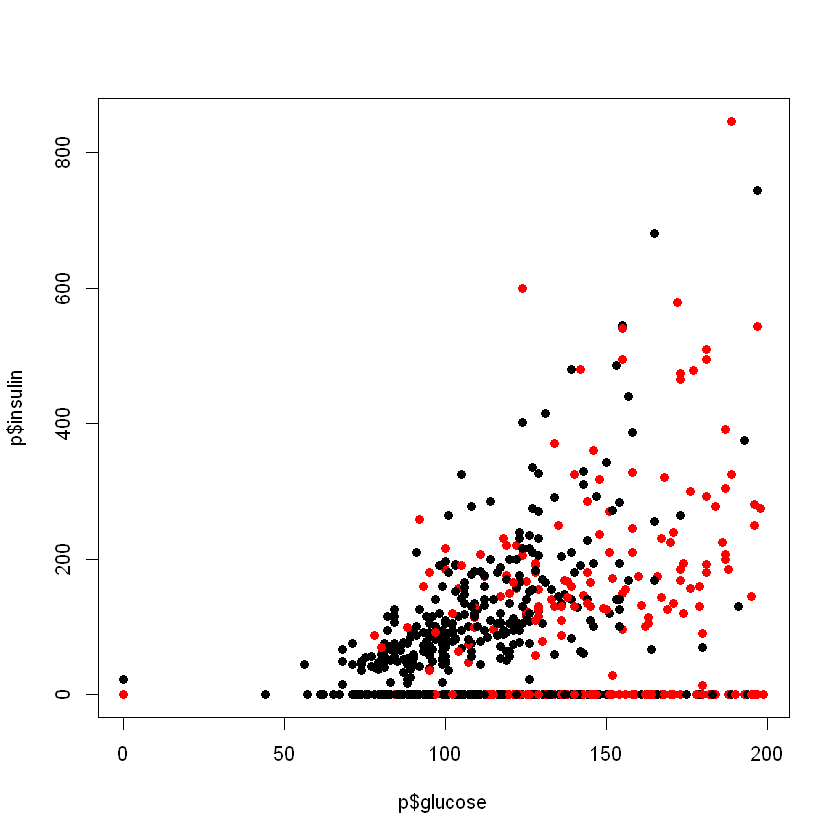

In [79]:
p = PimaIndiansDiabetes

plot ( p$glucose, p$insulin, 
       col = p$diabetes,
       pch = 19)

In [80]:
mgrid = function ( x, y, l = 100 ) {
    library(pracma) # needed to create a meshgrid

    x = seq(from = min(x), to = max(x), length = l)
    y = seq(from = min(y), to = max(y), length = l)
    
    mg = meshgrid(x = x, y = y)    
    
    return ( mg )
}

In [88]:
mg = mgrid ( p$glucose, p$insulin )
df_mg = data.frame ( glucose  = list(as.vector(mg$X)),
                     insulin = list(as.vector(mg$Y)) )
names(df_mg) = c("glucose", "insulin")
head(df_mg, 2)

,glucose,insulin
,<dbl>,<dbl>
1,0,0.000000
2,0,8.545455


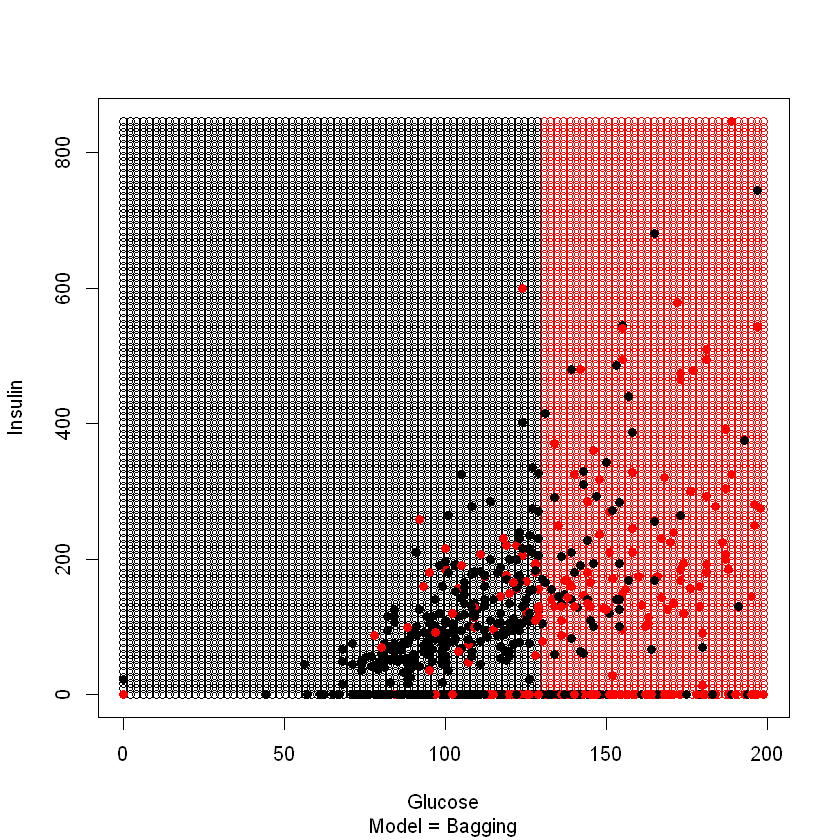

In [96]:
y_pred  = predict(model_bag, newdata = df_mg)

plot ( df_mg$glucose, df_mg$insulin, col = y_pred, 
       sub = "Model = Bagging",
       xlab = "Glucose",
       ylab = "Insulin")

# these are the actual data points
points ( p$glucose, p$insulin, 
       col = p$diabetes,
       pch = 19)

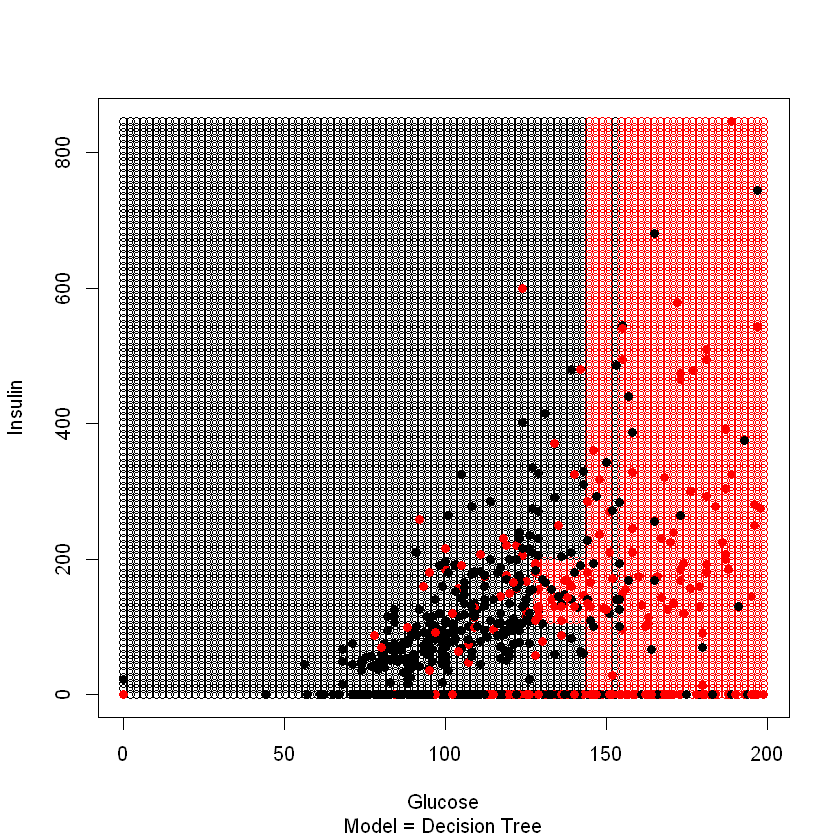

In [97]:
y_pred  = predict(model_dt, newdata = df_mg, "class")

plot ( df_mg$glucose, df_mg$insulin, col = y_pred,
       sub = "Model = Decision Tree",
       xlab = "Glucose",
       ylab = "Insulin")

# these are the actual data points
points ( p$glucose, p$insulin, 
         col = p$diabetes,
         pch = 19)

Here is a comparision. As you can see the decision tree overfits a bit, while the Bagging model does not. 

<img src="./pics/bagging-vs-decision-tree.png"/>

Similarly, here is a visual comparing ensemble of KNN classifier vs a single KNN classifier. You can see that the overfitting in the case of a single KNN classifier has been greatly reduced in the _ensemble_ model.

<img src="./pics/ensemble-vs-regular-knn.png"/>

The accuracy of the standalone model seems to be better than the ensemble. That is because we have a small dataset. Once the model hits a large real world dataset, the ensemble performs much better - specifically with _variance_.

<hr>

#### Random Forest

Random Forest is also a type of bagging based _ensemble_ model, but specifically designed for decision trees. The idea is really simple 
- A forest is a bunch of trees
- Each tree (decision tree) models the training data
- It is called **random forest** because the trees are modeling off of a random subset of the training data.

In [110]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators=20)
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

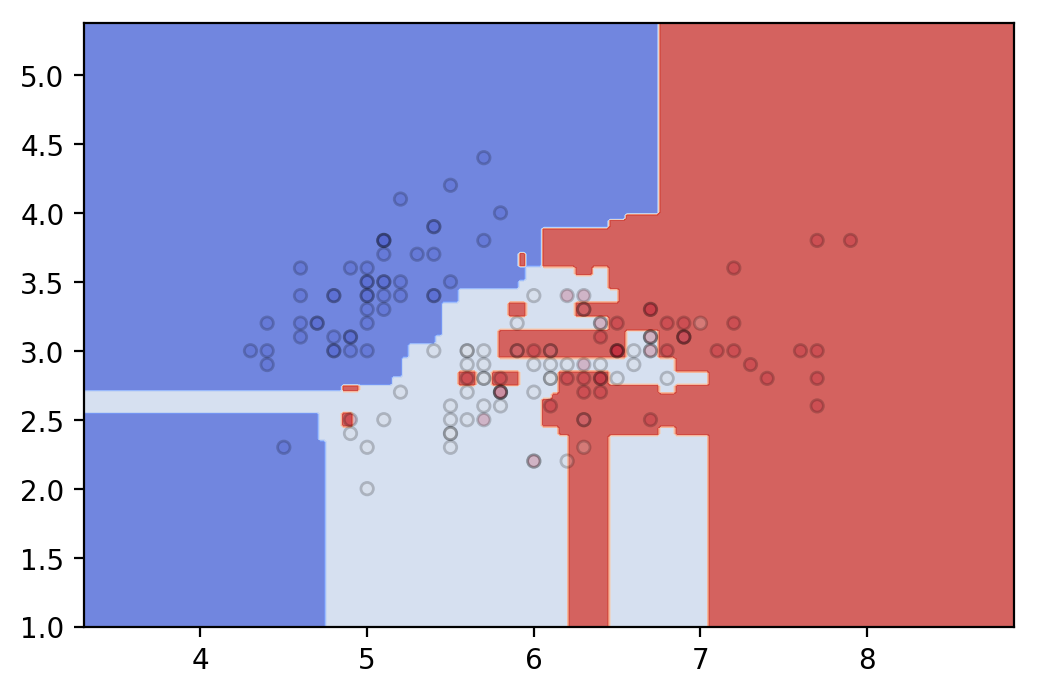

In [111]:
# plot the meshgrid
plot_contours(plt, classifier_rf, xx, yy,
                  cmap=plt.cm.coolwarm,
                  alpha=0.8)

# plot the actual data points for versicolor and virginica
plt.scatter(X0, X1, c=iris.target,
                  cmap=plt.cm.coolwarm,
                  s=20, edgecolors='k',
                  alpha=0.2)

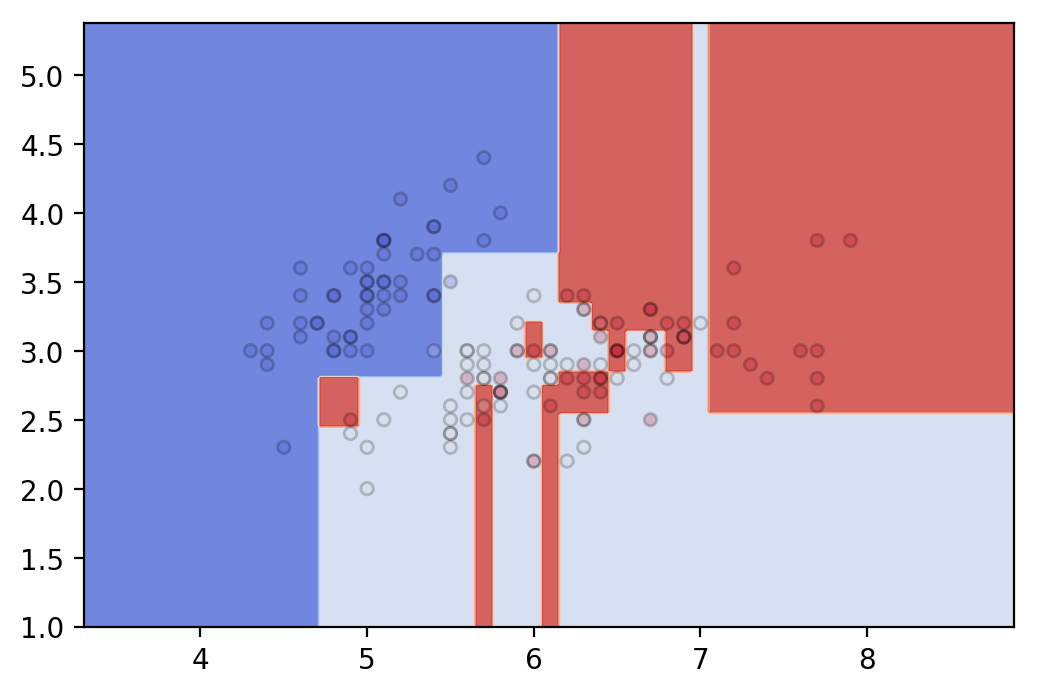

In [112]:
# plot the meshgrid
plot_contours(plt, classifier_dt, xx, yy,
                  cmap=plt.cm.coolwarm,
                  alpha=0.8)

# plot the actual data points for versicolor and virginica
plt.scatter(X0, X1, c=iris.target,
                  cmap=plt.cm.coolwarm,
                  s=20, edgecolors='k',
                  alpha=0.2)

Here is a quick visual of how the standard decision tree compares to the Random Forest(ensemble).

<img src="./pics/decision-tree-vs-random-forest.png"/>

Let's look at the accuracy score of decision tree vs random forest.

In [93]:
# random forest classifier score
classifier_rf.score(X_test,y_test)

0.6842105263157895

Let's compare this with a standard decision tree with the standard parameters(criteria="gini" and no max_depth or min_impurity_decrease parameters set).

In [113]:
from sklearn import tree

classifier_dt = tree.DecisionTreeClassifier()
classifier_dt.fit(X_train,y_train)

# standard decision tree classifier score
classifier_dt.score(X_test,y_test)

0.631578947368421

In this case the accuracy seems to have increased between the standard decision tree and the **Random Forest** classifier in favor of the **Random Forest**. However, what is important is that overfitting is reduced which results in less variance on the test dataset and in data from the real world that can be pretty varied.

### Boosting Implementation

We will cover three of the most commonly used boosting methods.

- Adaboost
- Gradient Boost

#### Adaboost

Adaboost is probably the most primitive of the boosting methods. It is mostly commonly used with the base algorithm as the decision tree. However, unlike a full tree, Adaboost uses only stumps (just one branch with a decision tree) which we will see below.

In the ramdom forest example above, we let a bunch of trees (forest) grow to their full extent without pruning them. However, Adaboost works differently. The principle is that a bunch of weak learners come together to produce a stronger model. Keeping in line with that approach, instead of a full tree, Adaboost works with **stumps**. What is a stump ? A stump is the smallest tree possible - just one node and 2 leaves.

<img src="./pics/stump.png"/>

A random forest is a forest of trees (fully grown) while adaboost is a forest of stumps. For example, in the picture above, the stump just divides the dataset into two parts

- setosa length > 4.5
- setosa length <= 4.5

 Your immediate question might be, what good is a stump ? It just divides the dataset into 2 parts - and that's it. How can a forest of stumps help build a model ? 

Adaboost specifically wants the individual learners to be weak learners. Because the key principal behind adaboost is that weak learners come together to form strong learners. Let's see how exactly Adaboost does it.

In a random forest each tree is made independent of each other. The order of the trees doesn't matter. Once all the trees are made (based on subsets of data), each tree has a vote (in the case of classification) and the class that most trees in the forest vote is chosen a winner. 

In contrast, not all stumps in the adaboost algorithm have equal weightage.

<img src="./pics/different-stump-weights.png"/>

But before we understand this, we have to understand what I meant by "weak learners come together to form strong learners". Let's go back to our iris dataset. To start with all the rows have equal weightage. For example, if there are 10 rows, each row gets 1/10th of a weight to start with.

<img src="./pics/equal-weightage-initially.png"/>

Since there are 4 predictors, there are 4 possible stumps to start with. And each of the stumps does it best to come up with it's best possible gini index. However, only one of them wins. In the following case, the stump that splits on _petal length_ wins.

<img src="./pics/stumps-gini-index.png"/>

Obviously, that stump can't be 100% right. So, some of the rows would be wrongly classified.

<img src="./pics/incorrectly-classified-rows.png"/>


These wrongly classified rows are given an increased weightage. The amount of increase is based on a specific formula that we can best leave to the algorithm at this point.

<img src="./pics/increased-weightage.png"/>

Create a new dataset of the same size as the first, but select the data based on the weights. So, the rows with more weights(errored out rows based on the first stump) will get more preference. Ultimately, the new dataset will have more rows that have errored out based on the first stump's classification.

<img src="./pics/new-dataset-more-error-rows.png"/>

Here is the the trick - since the new dataset has more rows that the first stump could not correctly classify, the second stump (based on this new data set) will correctly be able to identify the wrongly classified ones (gini index by definition does a good job on homogenous bunches of data).

The weights in the new dataset are reset.

<img src="./pics/new-dataset-equal-weightage.png"/>

And classification starts again with a bunch of stumps.

<img src="./pics/new-classification.png"/>


This sequence continues until a set of winning stumps are created each with particular weightage. The sume of the weighted vote determines the final classification.

<img src="./pics/stumps-classifying-species.png"/>

Let's see AdaBoost in action.

In [11]:
from sklearn.ensemble import AdaBoostClassifier

classifier_adb = AdaBoostClassifier(n_estimators=100,random_state=100,learning_rate=0.1)
classifier_adb.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=100, random_state=100)

In [13]:
X0, X1 = iris.data[:,0], iris.data[:, 1]

# Pass the data. make_meshgrid will automatically identify the min and max points to draw the grid
xx, yy = make_meshgrid(X0, X1) 

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi'] = 200

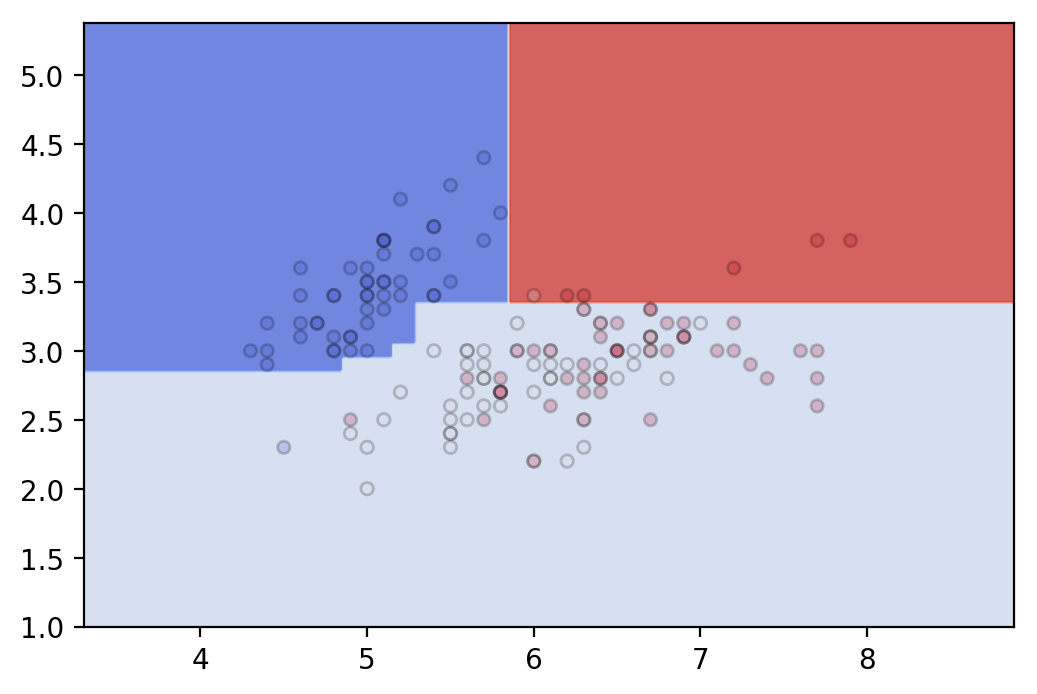

In [15]:
# plot the meshgrid
plot_contours(plt, classifier_adb, xx, yy,
                  cmap=plt.cm.coolwarm,
                  alpha=0.8)

# plot the actual data points for versicolor and virginica
plt.scatter(X0, X1, c=iris.target,
                  cmap=plt.cm.coolwarm,
                  s=20, edgecolors='k',
                  alpha=0.2)

In [12]:
classifier_adb.score(X_test,y_test)

0.6842105263157895

The score of the classifier is almost similar to the Random Forest, but a bit higher than the regular decision tree score.

### Gradient Boost

Gradient Boost is essentially a combination of Decision trees with some kind of Residuals minimizing algorithm (It could be _Ordinary Least Squares_ or _Gradient Descent_). As long as you understand the concept of residuals and how to minimize them, we are good to go to understand Gradient boost.

So, by definition, Gradient Boost is a good for for regression problems. However, it can be adapted to Classification problems using the logit/expit function ( used in _Logistic Regression_). So, let's get started with a regression problem, say the Boston Housting dataset.

#### Regression

<img src="./pics/boston-housing.png"/>

We first start off with an approximiation - typically in the case of regression it is the average. Calculate the residuals of each of the target variable against the average value to start with.

<img src="./pics/residuals.png"/>

Once you have done that, now, instead of fitting the target variable, fit the residuals. This is almost like doing a linear regression with Gradient Descent, except we are using decision trees for the same.

<img src="./pics/fit-residuals.png"/>

We would have to do this operation over and over (until a set number of iterations or until the reductions in residuals is not worth it). Let's go over this step by step. 

After running the decision tree to fit the residuals, calculate the target value. 

<img src="./pics/prediction-calculation.png"/>

For example, here is how the first row is predicted. 

<img src="./pics/prediction-calculation-example.png"/>

And here is a sample of how all of the sample rows could look like. 

<img src="./pics/sample-predictions.png"/>

The reason why we are showing all of the values here is to prove a point - that the prediction is getting one step closer to the actual values (from the average). 

<img src="./pics/predicted-vs-actual.png"/>

The next step is to iterate over the same process again. This time instead of calculating the residuals like before (actual - average), we use the new prediction to compute the residuals. If you compare the new predictions and residuals to the old ones, you can definitely see a trend getting the prediction moving towards the actual value and the residuals slowly decreasing.

<img src="./pics/new-vs-old-residuals.png"/>

In [1]:
from sklearn import datasets

boston = datasets.load_boston()

boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston.data[:,[0,4,5]], 
                                                    boston.target, test_size=0.2, random_state=100)

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(n_estimators = 100, max_depth = 4, learning_rate = 0.05)
regressor.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

You can also find out how important the model feels the features are. The features we have used in the model are
- CRIM - Crime Rate
- NOX  - Nitrous oxide in the air
- RM   - Number of rooms

In [38]:
regressor.feature_importances_

array([0.1299425, 0.2058841, 0.6641734])

This is the importance of these features according to the model

- CRIM - 0.12
- NOX  - 0.20
- RM   - 0.66

Let's calculate the r<sup>2</sup> score of the regressor.

In [12]:
# r2 score
regressor.score(X_test,y_test)

0.8047355573273204

That's an r<sup>2</sup> score of 0.81. Let's compare this to linear regression.

In [14]:
from sklearn.linear_model import LinearRegression

regressor_lin = LinearRegression().fit(X_train,y_train)
regressor_lin.score(X_test,y_test)

0.5941434559407395

As you can see, the Gradient Tree Boosting is way more powerful than simple linear regression.

##### Classification

What about classification ? Since we are trying to fit residuals, the way to do classification is via the logistic regression model - using the logit function. So, to classify the target we calculate the log odds(using the logit function) and then transform it to a value between 0 and 1 using the expit function.

In [24]:
# Load the iris dataset
from sklearn import datasets

iris = datasets.load_iris()

# split into train and test datasets
from sklearn.model_selection import train_test_split

# just use the sepal data
X_train, X_test, y_train, y_test = train_test_split(iris.data[:,0:2],iris.target)

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_gb = GradientBoostingClassifier(n_estimators = 200, max_depth = 4, learning_rate = 0.01)
classifier_gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [32]:
classifier_gb.score(X_test,y_test)

0.7631578947368421

And here is how the classification looks visually.

In [33]:
X0, X1 = iris.data[:,0], iris.data[:, 1]

# Pass the data. make_meshgrid will automatically identify the min and max points to draw the grid
xx, yy = make_meshgrid(X0, X1) 

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi'] = 200

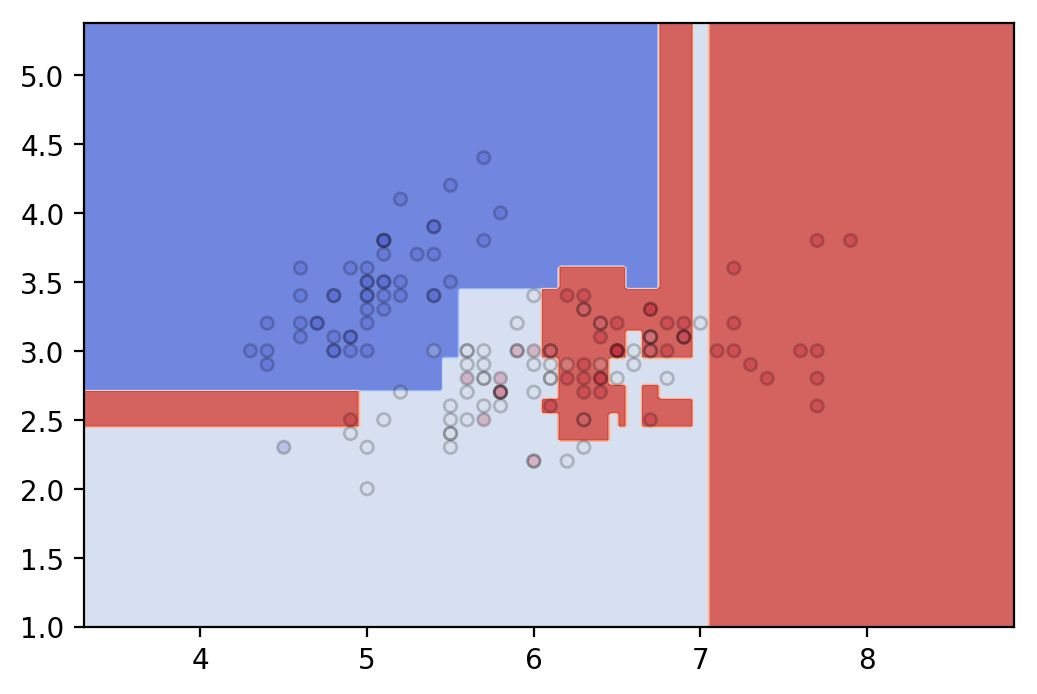

In [35]:
# plot the meshgrid
plot_contours(plt, classifier_gb, xx, yy,
                  cmap=plt.cm.coolwarm,
                  alpha=0.8)

# plot the actual data points for versicolor and virginica
plt.scatter(X0, X1, c=iris.target,
                  cmap=plt.cm.coolwarm,
                  s=20, edgecolors='k',
                  alpha=0.2)

In [36]:
classifier_gb.feature_importances_

array([0.68478571, 0.31521429])